# Credit Card Fraud Detection

## Context
Credit Card Fraud Detection model tailored for the Indian market, aiming to enhance cybersecurity
and minimize financial losses due to fraudulent activities in the digital payment sector.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Import Python Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

### Load and Read Dataset

In [3]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, dataset cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 284807 Rows and 31 columns


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


## Exploratory Data Analysis (EDA)

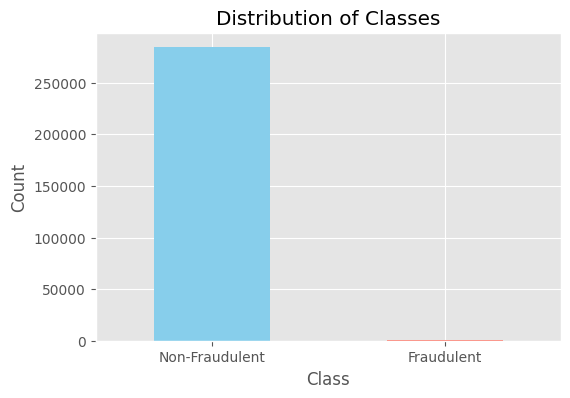

In [8]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### Time Series of Fradulent Transaction
-it calculates the frequency of fraudulent transactions over time.

- observed spikes in fraudulent transactions during  time period(65000,95000), which could indicate periods of increased fraudulent activity.


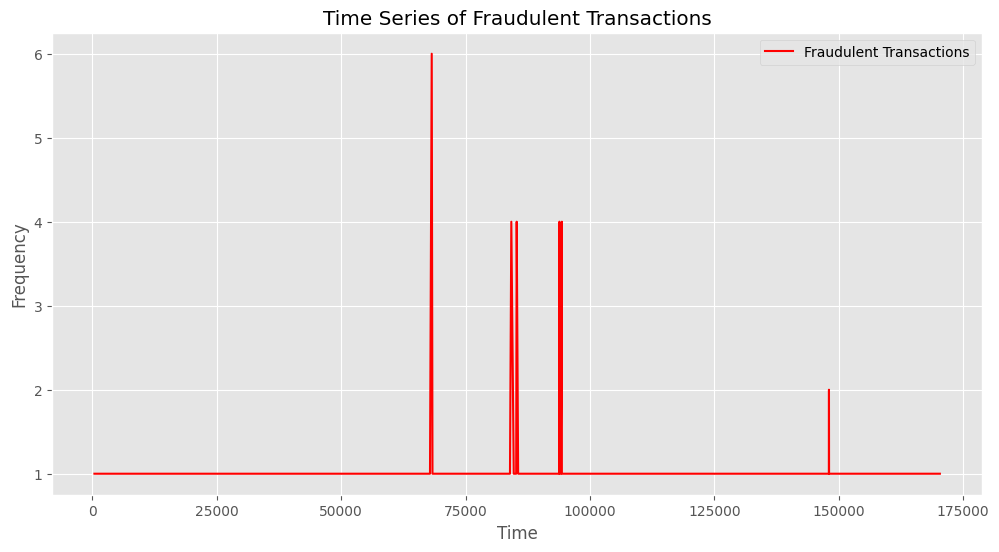

In [10]:
# Grouping the data by 'Time' and 'Class' and calculating the frequency of fraudulent transactions
fraudulent_transactions = df[df['Class'] == 1].groupby('Time').size()

# Plotting the time series of fraudulent transactions
plt.figure(figsize=(12, 6))
plt.plot(fraudulent_transactions.index, fraudulent_transactions.values, label='Fraudulent Transactions', color='red')
plt.title('Time Series of Fraudulent Transactions')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()

### Heatmap of Average Transaction Amounts over Time Intervals

Text(120.7222222222222, 0.5, 'Amount')

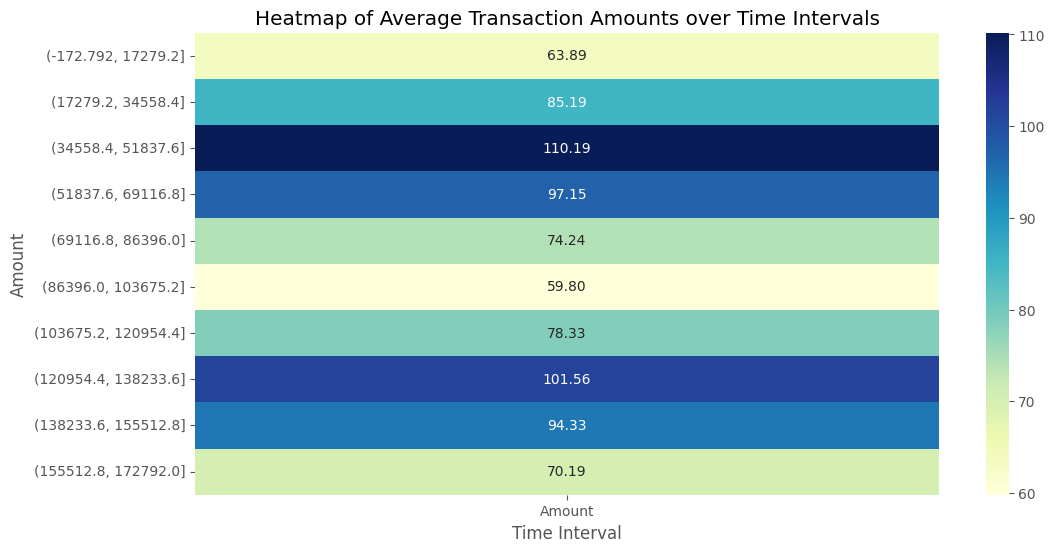

In [11]:
df['Time_Interval'] = pd.cut(df['Time'], bins=10)  # Adjust the number of bins as needed

# Creating a pivot table to aggregate 'Amount' values for each time interval
pivot_table = df.pivot_table(values='Amount', index='Time_Interval', aggfunc=np.mean)

# Creating the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap of Average Transaction Amounts over Time Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Amount')

### Kernel Density Estimation of Transaction Amounts
We use a KDE plot to visualize the distribution of transaction amounts for fraudulent and non-fraudulent transactions.
we might see that fraudulent transactions tend to have higher or lower amounts compared to non-fraudulent transactions.

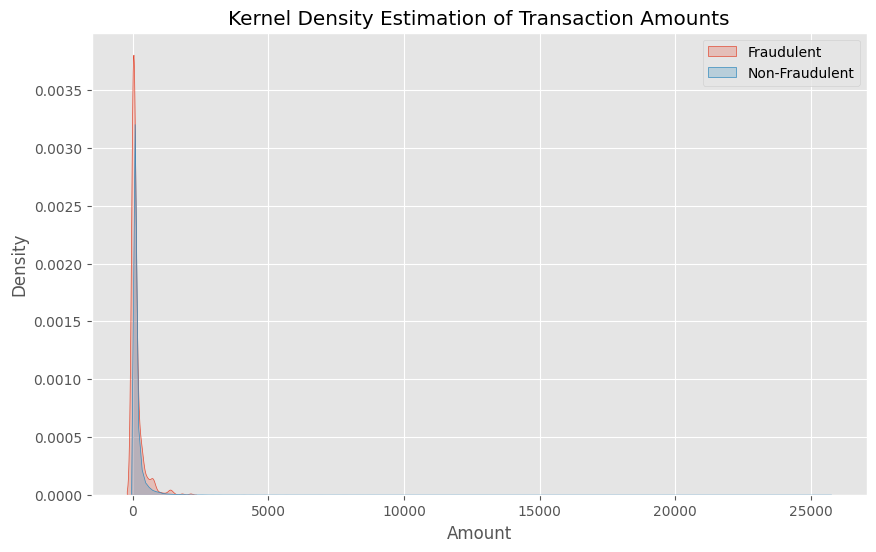

In [12]:
# Creating a KDE plot for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraudulent', shade=True)

# Creating a KDE plot for non-fraudulent transactions
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraudulent', shade=True)

# Adding labels and title
plt.title('Kernel Density Estimation of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()

### Histogram of Transaction Amounts

Text(0, 0.5, 'Frequency')

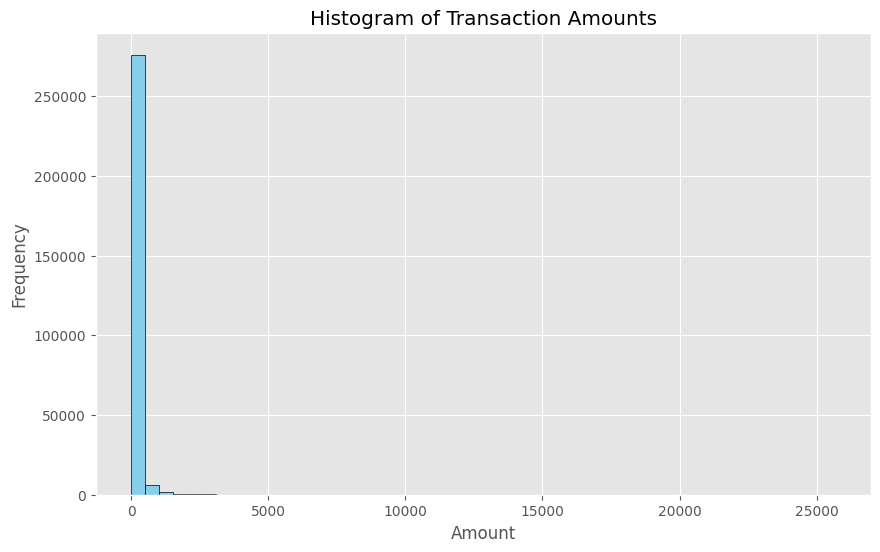

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

The total amount of fraudulent transactions:  60127.96999999997
The total number of fraudulent transactions:  492
The total amount of non-fraudulent transactions:  25102462.039983638
The total number of fraudulent transactions:  284315


(-1.1048316384127523,
 1.201652769853699,
 -1.1262944193228586,
 1.1012521152058503)

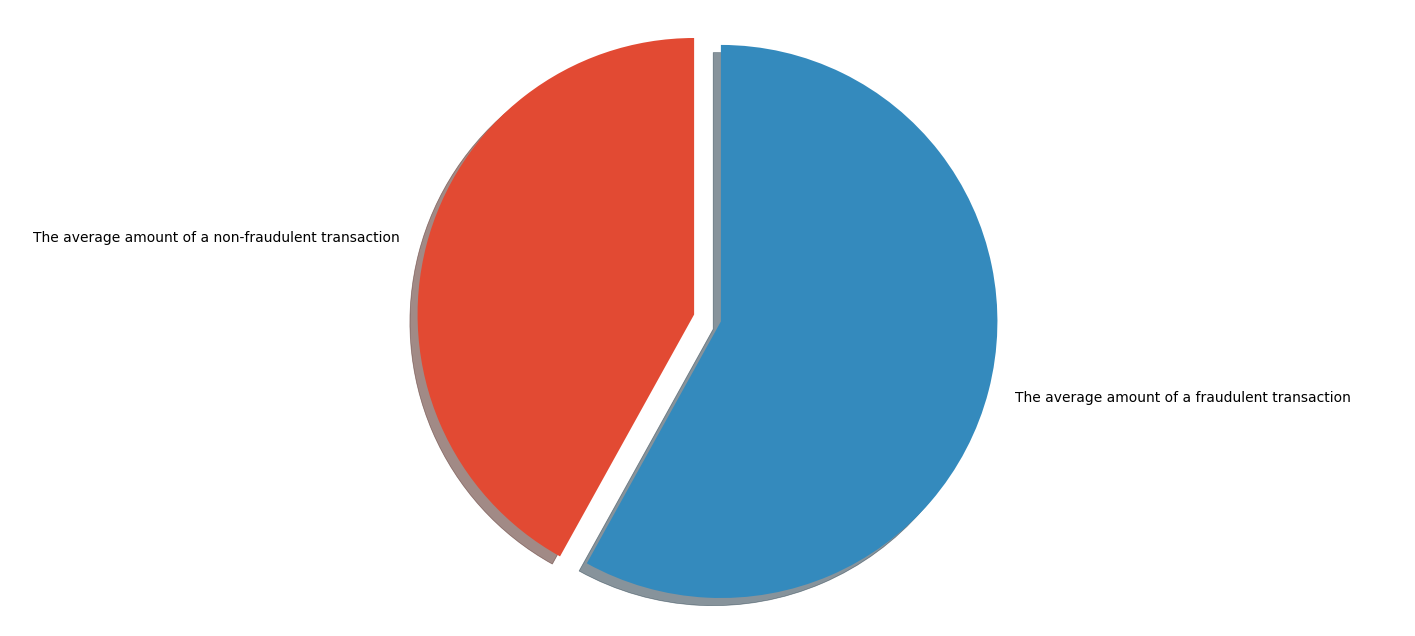

In [15]:
fraudulent_amount = 0
number_of_fraudulent_transactions = 0;
for record in df.itertuples():
    if record.Class == True:
        fraudulent_amount += record.Amount
        number_of_fraudulent_transactions += 1
print('The total amount of fraudulent transactions: ', fraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_fraudulent_transactions)  
fraudulent_mean = fraudulent_amount / number_of_fraudulent_transactions
        
nonfraudulent_amount = 0
number_of_nonfraudulent_transactions = 0
for record in df.itertuples():
    if record.Class == False:
        nonfraudulent_amount += record.Amount
        number_of_nonfraudulent_transactions += 1
print('The total amount of non-fraudulent transactions: ', nonfraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_nonfraudulent_transactions)  
nonfraudulent_mean = nonfraudulent_amount / number_of_nonfraudulent_transactions
        
d = {'Class':[0, 1], 'Mean':[nonfraudulent_mean, fraudulent_mean]}

fig, ax = plt.subplots(figsize=(18,8))

ax.pie(d["Mean"],
       explode=[0, 0.1],
       labels=['The average amount of a non-fraudulent transaction', 'The average amount of a fraudulent transaction'],
       shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Depict how the frequency of fraudulent transactions (orange) is distributed in time, compared to that of the non-fraudulents (blue).

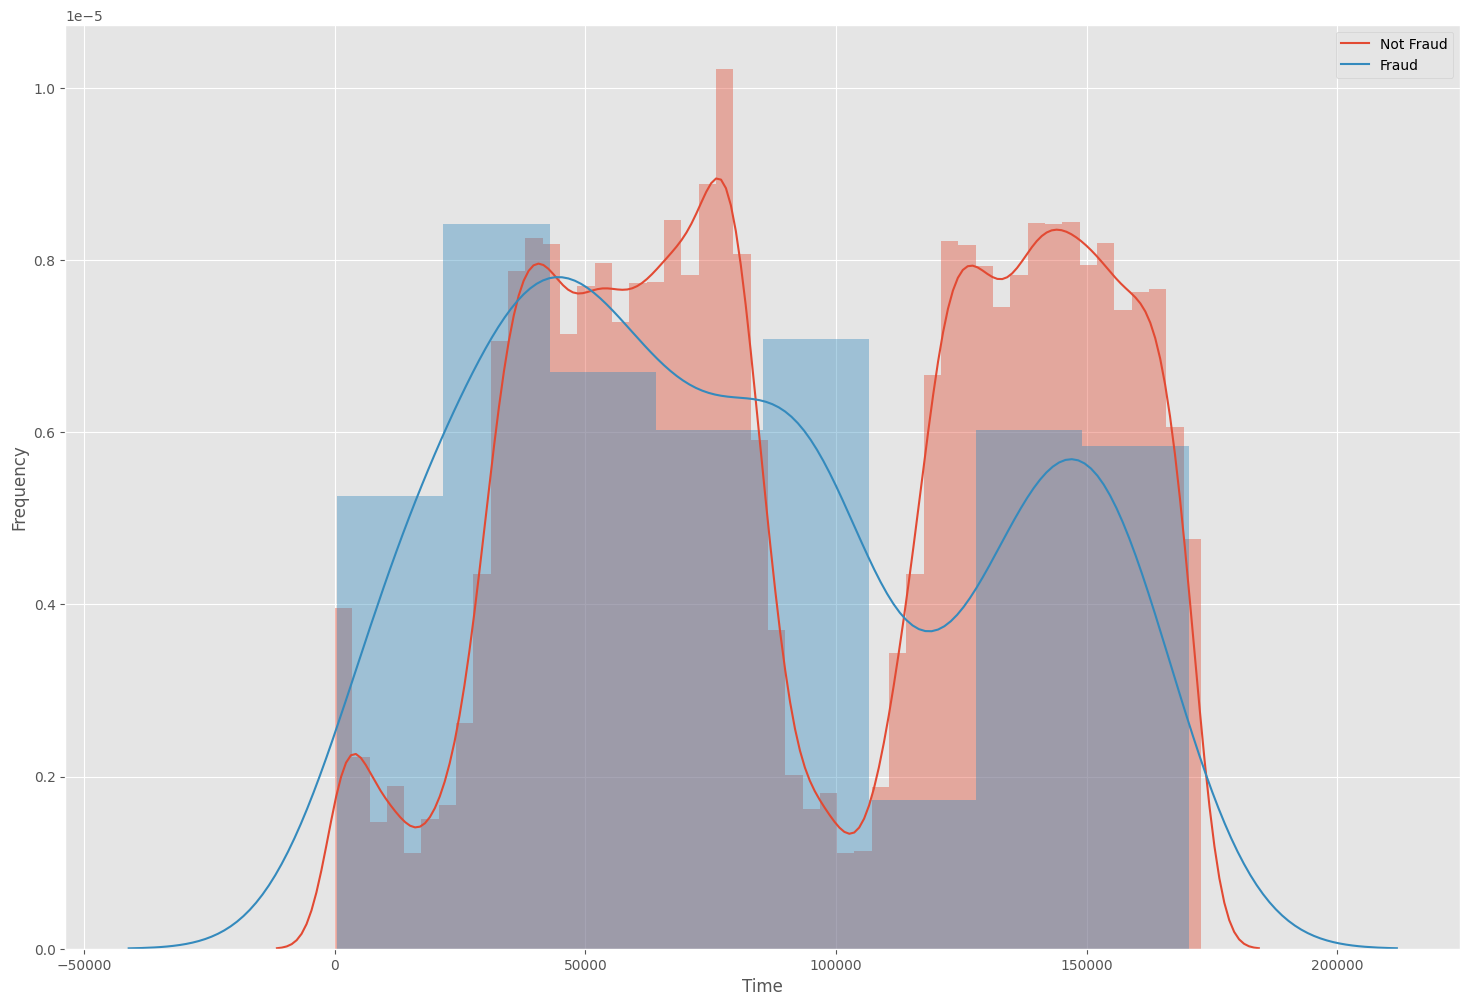

In [17]:
fraudulent_transactions = df[df['Class'] == 1]
nonfraudulent_transactions = df[df['Class'] == 0]

plt.figure(figsize=(18,12))

sns.distplot(a=nonfraudulent_transactions["Time"], kde=True)
plot = sns.distplot(a=fraudulent_transactions["Time"], kde=True)

plot.set(xlabel ='Time', ylabel ='Frequency')
plot.legend(['Not Fraud', 'Fraud'])

In [18]:
df["Amount"].sort_values(ascending=False).head(10)

274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
169457    11789.84
284249    10199.44
227921    10000.00
74699      8790.26
245474     8787.00
Name: Amount, dtype: float64

## Model Implementation

### Import Relevant Scikit-Learn Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectPercentile
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### (Model Implementation Phase-I)

In [ ]:
#Defined X value and y value , and split the data train
X = df.drop(columns="Class")
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (213605, 30)
X Test  :  (71202, 30)
Y Train :  (213605,)
Y Test  :  (71202,)


In [ ]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
SVC = SVC()

In [ ]:
li = [LR,DTC,RFC,SVC]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

LogisticRegression() :               precision    recall  f1-score   support

           0       0.93      0.91      0.92       104
           1       0.90      0.92      0.91        86

    accuracy                           0.92       190
   macro avg       0.91      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       0.94      0.84      0.88       104
           1       0.82      0.93      0.87        86

    accuracy                           0.88       190
   macro avg       0.88      0.88      0.88       190
weighted avg       0.89      0.88      0.88       190

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.93      0.91      0.92        86

    accuracy   

### Feature Selection (Model Implementation Phase-II) (For Web App Model)
Selecting most important features which have percentile more than or equal to 50.

In [ ]:
F_50 = SelectPercentile( percentile= 50)

In [ ]:
set_X = F_50.fit_transform(X,y)

In [ ]:
new_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (X.columns, F_50.get_support()) if j == True ])
new_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


<Axes: >

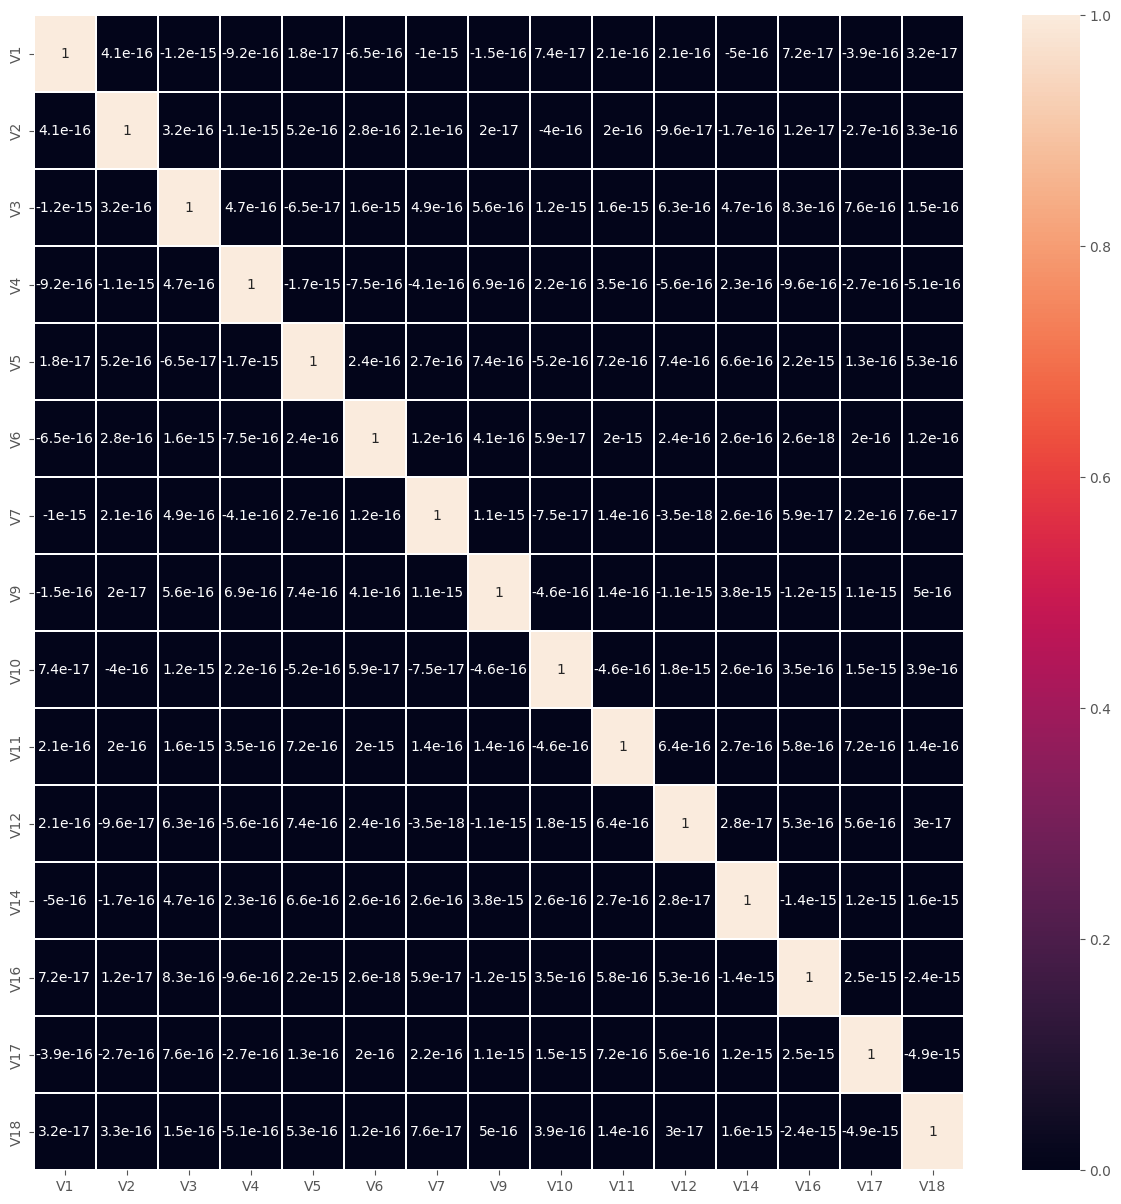

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(new_x.corr(),annot=True,linecolor='white',linewidths=0.2)

In [ ]:
X = new_x
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (213605, 15)
X Test  :  (71202, 15)
Y Train :  (213605,)
Y Test  :  (71202,)


In [ ]:
li = [LR,DTC,RFC,SVC]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.84      0.61      0.71       113

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.85     71202
weighted avg       1.00      1.00      1.00     71202

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.71      0.77      0.74       113

    accuracy                           1.00     71202
   macro avg       0.86      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.93      0.81      0.86       113

    accuracy   

### Handling Imbalanced Dataset (Model Implementation Phase-III)

In [ ]:
undersample = RandomUnderSampler()

In [ ]:
X_smote,y_smote = undersample.fit_resample(X_train,y_train)

0    284315
1       492
Name: Class, dtype: int64

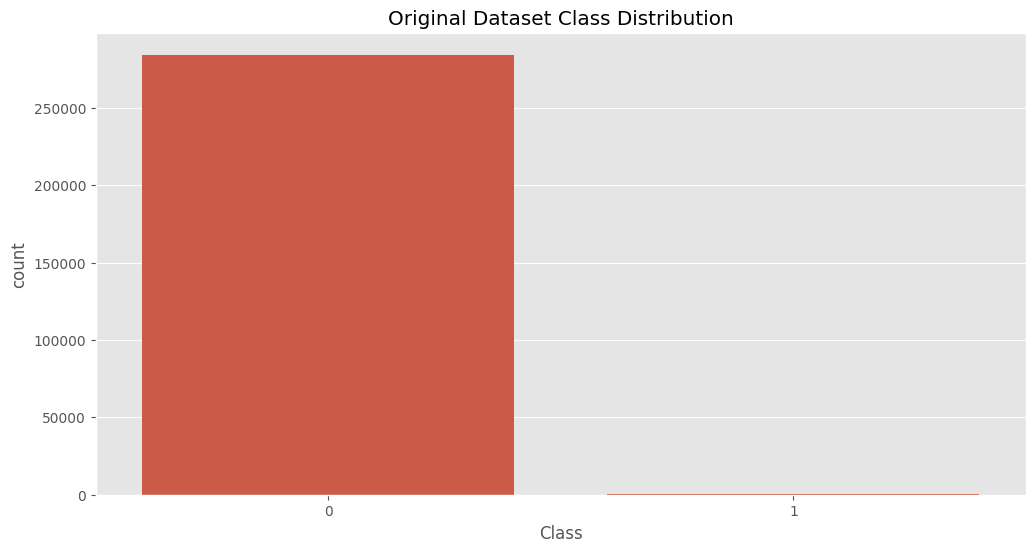

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Original Dataset Class Distribution')
sns.countplot(data=df,x='Class')
df['Class'].value_counts()

0    379
1    379
Name: Class, dtype: int64

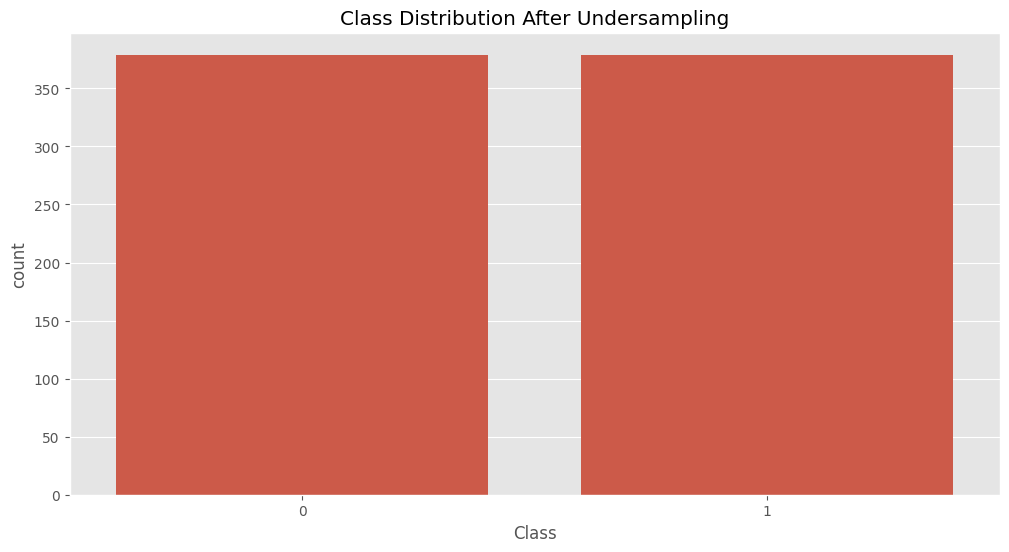

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Class Distribution After Undersampling')
sns.countplot(data=df,x=y_smote)
y_smote.value_counts()

<Axes: title={'center': 'Correlation After Undersampling'}>

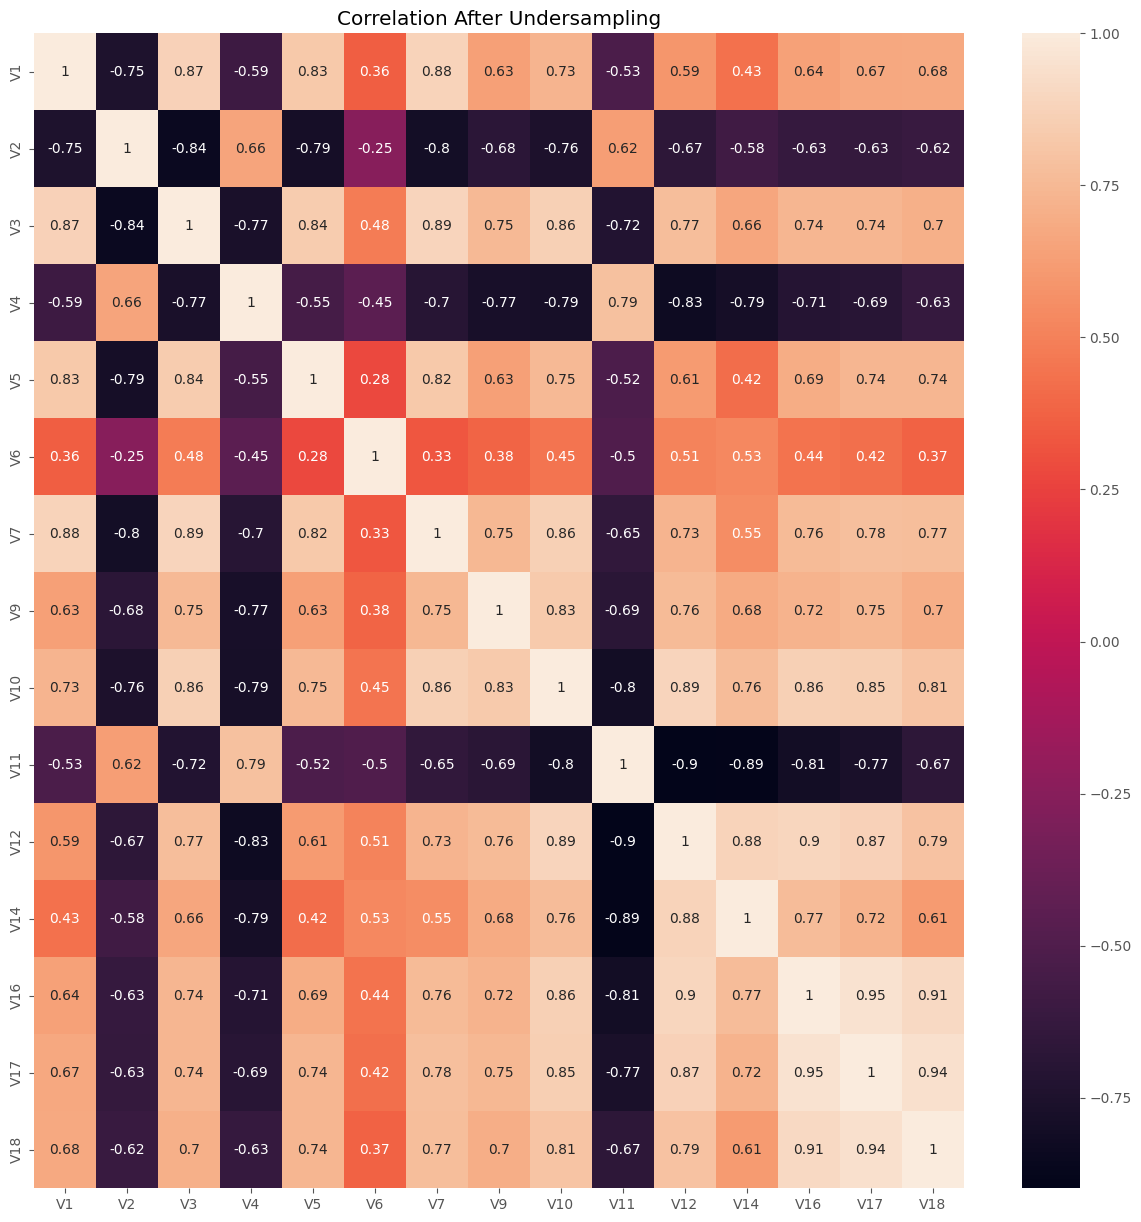

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Correlation After Undersampling')
sns.heatmap(X_smote.corr(),annot=True)

### Splitting and Training Dataset Based on Sampled Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (568, 15)
X Test  :  (190, 15)
Y Train :  (568,)
Y Test  :  (190,)


In [ ]:
li = [LR,DTC,RFC,SVC]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

LogisticRegression() :               precision    recall  f1-score   support

           0       0.95      0.98      0.97       104
           1       0.98      0.94      0.96        86

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       0.93      0.89      0.91       104
           1       0.88      0.92      0.90        86

    accuracy                           0.91       190
   macro avg       0.90      0.91      0.90       190
weighted avg       0.91      0.91      0.91       190

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       0.95      0.98      0.97       104
           1       0.98      0.94      0.96        86

    accuracy   

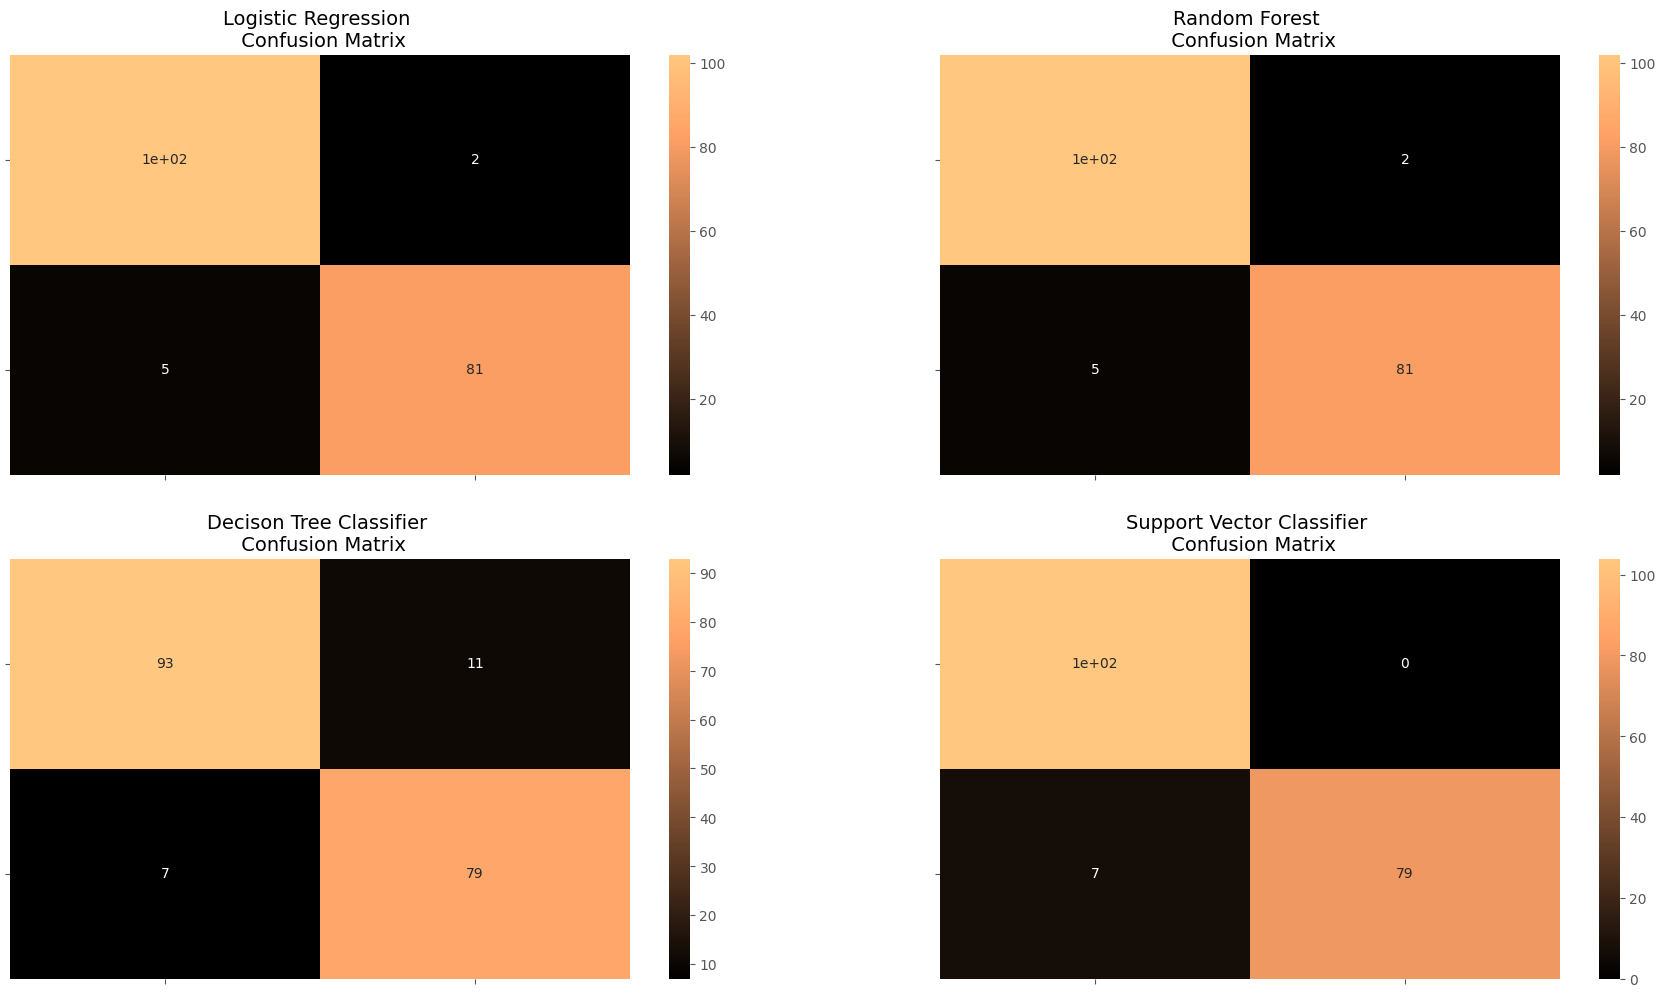

In [ ]:
y_pred_log_reg = LR.predict(X_test)
y_pred_rfc = RFC.predict(X_test)
y_pred_tree = DTC.predict(X_test)
y_pred_svc = SVC.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
rfc_cf = confusion_matrix(y_test, y_pred_rfc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
svc_cf = confusion_matrix(y_test,y_pred_svc)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rfc_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Decison Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

## Save Final Model

In [ ]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(RFC,pickle_out)
pickle_out.close()

In [ ]:
RFC.predict([[2.052962	,0.101032	,-2.061370	,0.139861	,0.708547	,-0.992524	,0.637264	,-0.076496	,0.209847	,1.073517	,0.963732	,0.977340	,-0.378598	,-0.584165	,0.036628]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
y_test

594    1
97     0
281    0
657    1
585    1
      ..
108    0
623    1
56     0
204    0
234    0
Name: Class, Length: 190, dtype: int64